In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 

In [91]:
def MSE(Y, YH):
     return np.square(Y - YH).mean()  
def data_generation():

    z0=0.1*np.random.uniform(0,5,[10000])          ## unconsidered IV
    x0=z0
    z1=np.random.uniform(0,5,[10000])           ## Instrumental variable
    x1 =0.5*z1+1 ## 
#     x1 =0.5*z+1 ## 
                                     #x1->y1
    u=np.random.uniform(0,5,[10000])            # Confounder
    x2=u                                    #  u->x2
    y2=4*u                                      #  u->y2
    x=x1+x2+x0                               # total x
    y1=2*x[:] 
    y3=np.random.uniform(0,5,[10000])
    y=y1+y2+ 0.1*y3      # total y
#     y=y1+y2       # total y
    print(pearsonr(y,x),pearsonr(x,u),pearsonr(u, z1),"correaltion and p-value (y,x),(x,u),(u,z)")  
    ind=np.argsort(x)
    x=x[ind]
    z1=z1[ind]
    y=y[ind]
    return z1,x,y

In [92]:
z,x,y=data_generation()

(0.9548072404695949, 0.0) (0.8917918367192793, 0.0) (0.012174529244686143, 0.22347265834116523) correaltion and p-value (y,x),(x,u),(u,z)


[2.09720808 9.83470069] coefficient and intercept, method is 2sls
75.36893236469378 loss only reconstructed
0.35195006847000193 loss with residual2
[ 5.16735189 -5.57224205] 6.871550317101811 coef and loss no decomp,(y,x)association


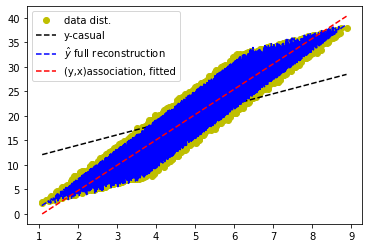

In [96]:

plt.plot(x,y, 'yo',label="data dist.") # 'yo' = yellow circle marker
##Two-Stage least squares
#stage 1
coef1 = np.polyfit(z,x,1)
poly1d_fn1 = np.poly1d(coef1) 
x_fitted=poly1d_fn1(z)
coef = np.polyfit(x_fitted,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
print(coef,"coefficient and intercept, method is 2sls")
plt.plot( x, poly1d_fn(x), '--k',label=r"y-casual") #'--k'=black dashed line, 
loss=MSE(y,poly1d_fn(x_fitted))
print(loss,"loss only reconstructed")

# x_residual=x-x_fitted
# y_residual=y-poly1d_fn(x_fitted)
# coef_resi = np.polyfit(x_residual,y_residual,1)
# poly1d_fn_resi = np.poly1d(coef_resi)
# plt.plot( x, poly1d_fn_resi(x_residual)+poly1d_fn(x_fitted), '--b') #'--k'=black dashed line, 'yo' = yellow circle marker
# loss=MSE(y,poly1d_fn_resi(x_residual)+poly1d_fn(x_fitted))
# print(loss,"loss with residual")

###
x_residual=x-x_fitted
y_residual=y-poly1d_fn(x)
coef_resi = np.polyfit(x_residual,y_residual,1)
poly1d_fn_resi = np.poly1d(coef_resi)
plt.plot( x, poly1d_fn_resi(x_residual)+poly1d_fn(x), '--b',label=r"$\hat{y}$ full reconstruction") #'--k'=black dashed line, 'yo' = yellow circle marker
loss=MSE(y,poly1d_fn_resi(x_residual)+poly1d_fn(x))
print(loss,"loss with residual2")

##no decomp squares
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
plt.plot( x, poly1d_fn(x), '--r',label="(y,x)association, fitted") #'--k'=black dashed line, 'yo' = yellow circle marker
plt.legend()
loss=MSE(y,poly1d_fn(x))
print(coef,loss,"coef and loss no decomp,(y,x)association")
